### Economic Mobility Prediction, focusing on Regression Techniques

Analysis of economic mobility across generations in USA. Data is aggregate statistics about economic mobility for several hundred communities, containing most of the American Population


#### Data Summary

Target Variable: Economic Mobility

## Variable Definitions

- **Mobility** – Probability that a child born in 1980–1982 into the lowest 20% of household income reaches the top 20% by age 30.

- **Population in 2000** – Total community population in the year 2000.

- **Urban** – Indicates whether the community is primarily urban or rural.

- **Black** – Percentage of residents identifying as Black alone.

- **Racial segregation** – Degree of residential segregation between racial groups.

- **Income segregation** – Degree of residential segregation between income groups.

- **Segregation of poverty** – Residential segregation among households in the bottom 25% of national income.

- **Segregation of affluence** – Residential segregation among households in the top 25% of national income.

- **Commute** – Fraction of workers commuting fewer than 15 minutes.

- **Mean income** – Average per‑capita income in 2000.

- **Gini** – Overall income‑inequality index (0 = equal, higher = more unequal).

- **Share 1%** – Income share received by the top 1% of earners.

- **Gini bottom 99%** – Gini coefficient calculated only for the bottom 99% of incomes.

- **Fraction middle class** – Fraction of parents with income between the national 25th and 75th percentiles.

- **Local tax rate** – Fraction of total income paid as local taxes.

- **Local government spending** – Per‑capita local‑government expenditure.

- **Progressivity** – How strongly state income‑tax rates increase with income.

- **EITC** – State contribution to the Earned Income Tax Credit.

- **School expenditures** – Average per‑pupil spending in public schools.

- **Student/teacher ratio** – Number of students per teacher in public schools.

- **Test scores** – Residuals from regressing average math and English test scores on per‑capita income.

- **High school dropout rate** – Residuals from regressing dropout rates on per‑capita income.

- **Colleges per capita** – Number of colleges per person.

- **College tuition** – In‑state tuition for full‑time students.

- **College graduation rate** – Residuals from regressing graduation rates on per‑capita income.

- **Labor force participation** – Fraction of adults participating in the labor force.

- **Manufacturing** – Fraction of workers employed in manufacturing.

- **Chinese imports** – Growth in imports from China per worker between 1990 and 2000.

- **Teenage labor** – Fraction of 14–16‑year‑olds participating in the labor force.

- **Migration in** – Fraction of the 2000 population who moved into the community.

- **Migration out** – Fraction of the population who moved away from the community.

- **Foreign** – Fraction of residents born outside the United States.

- **Social capital** – Index of civic engagement (voter turnout, census participation, community‑organization involvement).

- **Religious** – Share of population belonging to an organized religious group.

- **Violent crime** – Annual rate of violent‑crime arrests per person.

- **Single motherhood** – Fraction of households with children that are headed by a single mother.

- **Divorced** – Fraction of adults who are divorced.

- **Married** – Fraction of adults who are married.

- **Longitude** – Longitude of the community center.

- **Latitude** – Latitude of the community center.

- **ID** – Numeric identifier for the community.

- **Name** – Name of the community’s principal city or town.

- **State** – U.S. state of the community.

#### EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('mobility.csv')
df.head()

ID            Name  Mobility State  Population  Urban  Black  Seg_racial  \
0  100    Johnson City  0.062199    TN      576081      1  0.021       0.090   
1  200      Morristown  0.053652    TN      227816      1  0.020       0.093   
2  301  Middlesborough  0.072635    TN       66708      0  0.015       0.064   
3  302       Knoxville  0.056281    TN      727600      1  0.056       0.210   
4  401   Winston-Salem  0.044801    NC      493180      1  0.174       0.262   

   Seg_income  Seg_poverty  ...  Migration_out  Foreign_born  Social_capital  \
0       0.035        0.030  ...          0.005         0.012          -0.298   
1       0.026        0.028  ...          0.014         0.023          -0.767   
2       0.024        0.015  ...          0.012         0.007          -1.270   
3       0.092        0.084  ...          0.014         0.020          -0.222   
4       0.072        0.061  ...          0.019         0.053          -0.018   

   Religious  Violent_crime  Single_mothers  Divorced  Married  Longitude  \
0      0.514          0.001           0.190     0.110    0.601 -82.436386   
1      0.544          0.002           0.185     0.116    0.613 -83.407249   
2      0.668          0.001           0.211     0.113    0.590 -83.535332   
3      0.602          0.001           0.206     0.114    0.575 -84.242790   
4      0.488          0.003           0.220     0.092    0.586 -80.505333   

    Latitude  
0  36.470371  
1  36.096539  
2  36.551540  
3  35.952259  
4  36.081276  

[5 rows x 43 columns]

In [24]:
print(df.shape)
df.describe()

(741, 43)


ID    Mobility    Population       Urban       Black  \
count    741.000000  729.000000  7.410000e+02  741.000000  741.000000   
mean   22443.815115    0.100423  3.797866e+05    0.438596    0.077812   
std    11125.539098    0.052654  1.047226e+06    0.496550    0.122233   
min      100.000000    0.022102  1.193000e+03    0.000000    0.000000   
25%    12701.000000    0.065985  3.838400e+04    0.000000    0.004000   
50%    26106.000000    0.089506  1.038420e+05    0.000000    0.022000   
75%    31301.000000    0.119403  2.898490e+05    1.000000    0.082000   
max    39400.000000    0.469697  1.639336e+07    1.000000    0.658000   

       Seg_racial  Seg_income  Seg_poverty  Seg_affluence     Commute  ...  \
count  741.000000  741.000000   741.000000     741.000000  741.000000  ...   
mean     0.129752    0.039516     0.036265       0.041622    0.457217  ...   
std      0.100056    0.031814     0.029289       0.035295    0.142627  ...   
min      0.000000    0.000000     0.000000       0.000000    0.156000  ...   
25%      0.056000    0.014000     0.013000       0.013000    0.345000  ...   
50%      0.107000    0.031000     0.028000       0.032000    0.436000  ...   
75%      0.181000    0.057000     0.054000       0.060000    0.563000  ...   
max      0.554000    0.138000     0.129000       0.154000    0.945000  ...   

       Migration_out  Foreign_born  Social_capital   Religious  Violent_crime  \
count     724.000000    741.000000      722.000000  741.000000     714.000000   
mean        0.016830      0.041173        0.171651    0.545572       0.001594   
std         0.007592      0.050399        1.295328    0.167170       0.001488   
min         0.000000      0.000000       -3.199000    0.110000       0.000000   
25%         0.012000      0.012000       -0.765500    0.425000       0.001000   
50%         0.016000      0.024000        0.064000    0.525000       0.001000   
75%         0.021000      0.046000        0.965250    0.643000       0.002000   
max         0.052000      0.397000        7.305000    1.308000       0.028000   

       Single_mothers    Divorced     Married   Longitude    Latitude  
count      741.000000  741.000000  741.000000  741.000000  741.000000  
mean         0.201730    0.096656    0.574452  -95.552122   39.055892  
std          0.053021    0.017947    0.046876   15.180640    6.103953  
min          0.082000    0.040000    0.373000 -170.719666   19.578831  
25%          0.171000    0.085000    0.545000 -101.532440   34.795059  
50%          0.196000    0.098000    0.580000  -93.628548   38.918827  
75%          0.226000    0.109000    0.607000  -84.793350   42.875656  
max          0.434000    0.190000    0.695000  -67.605003   68.371017  

[8 rows x 41 columns]

In [19]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)


ID                            0.000000
Name                          0.000000
Mobility                      1.619433
State                         0.000000
Population                    0.000000
Urban                         0.000000
Black                         0.000000
Seg_racial                    0.000000
Seg_income                    0.000000
Seg_poverty                   0.000000
Seg_affluence                 0.000000
Commute                       0.000000
Income                        0.000000
Gini                          0.000000
Share01                       4.318489
Gini_99                       4.318489
Middle_class                  4.318489
Local_tax_rate                0.134953
Local_gov_spending            0.269906
Progressivity                 0.000000
EITC                          0.000000
School_spending               1.349528
Student_teacher_ratio         4.048583
Test_scores                   4.858300
HS_dropout                   19.973009
Colleges                 

school related columns have quite high null rates, doing a closer inspection

In [28]:
print(f"College Data Summary:\n\n", df['Colleges'].unique())
print()
print(f"HS Dropout Data Summary:\n\n", df['HS_dropout'].unique())

College Data Summary:

 [0.014 0.009 0.045 0.011   nan 0.02  0.015 0.013 0.026 0.018 0.037 0.023
 0.034 0.019 0.012 0.016 0.025 0.022 0.004 0.017 0.048 0.01  0.029 0.024
 0.021 0.053 0.043 0.008 0.007 0.005 0.041 0.028 0.036 0.027 0.03  0.006
 0.031 0.039 0.038 0.035 0.04  0.033 0.032 0.001 0.059 0.042 0.046 0.139
 0.07  0.088 0.06  0.079 0.083 0.071 0.243 0.062 0.052 0.072 0.051 0.056
 0.118 0.09  0.047 0.058 0.11  0.05  0.106 0.054 0.196 0.064 0.135 0.116
 0.078 0.109 0.091 0.068]

HS Dropout Data Summary:

 [-0.015 -0.024 -0.005 -0.011  0.023    nan  0.016  0.021  0.03   0.013
  0.018  0.026  0.034  0.022  0.024  0.017  0.019 -0.018  0.02   0.035
  0.042  0.015 -0.003  0.012  0.002  0.001 -0.025  0.041  0.005  0.011
  0.014  0.053  0.038  0.031  0.046  0.055  0.     0.049  0.027  0.009
  0.007  0.01   0.006 -0.001 -0.009 -0.022 -0.008 -0.016 -0.014 -0.006
 -0.01  -0.012 -0.013 -0.004 -0.007 -0.027  0.025  0.004  0.032 -0.017
  0.037  0.068  0.047  0.054  0.048  0.089  0.029  0.073 -

Missing values likely occurring as a result of small communities having insufficient data. Large loss of data would result from just dropping columns with na values, and may mean smaller communities are underrepresented. Will explore data further before defining strategy to deal with missing values

target could potentially benefit from a log transform, as normal density is right - tailed. Will analyse further below

##### Correlation Analysis

<Axes: >

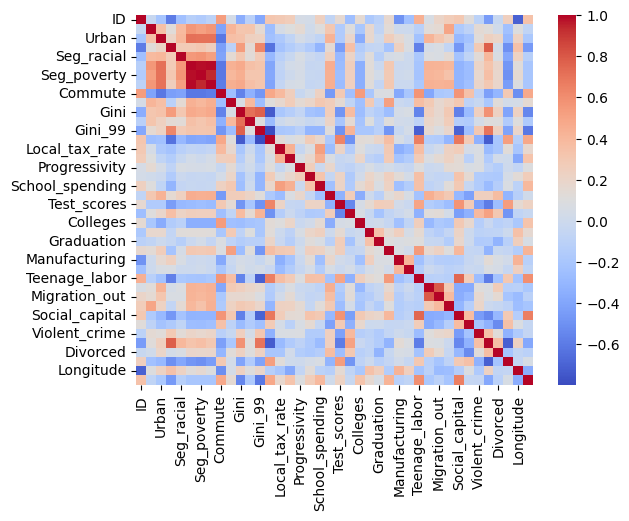

In [85]:
df_num = df.select_dtypes(include='number').drop('Mobility', axis = 1)
df_cat = df.select_dtypes(include='object')

corr_pearson = df_num.corr(method='pearson')
sns.heatmap(corr_pearson, cmap='coolwarm')

In [109]:
C = corr_pearson.values.astype(float)
A = np.abs(C)
i, j = np.triu_indices_from(A, k=1)

rank = {}

for r, c in zip(i, j):
    rank[(corr_pearson.index[r], corr_pearson.columns[c])] = A[r, c]

df_rank = pd.DataFrame(
    [(k[0], k[1], v) for k, v in rank.items()],
    columns=['var1', 'var2', 'corr']
)
df_rank.sort_values('corr', ascending=False, inplace=True)
df_rank.head(10)

var1            var2      corr
186     Seg_income   Seg_affluence  0.986031
185     Seg_income     Seg_poverty  0.981056
219    Seg_poverty   Seg_affluence  0.940083
402        Gini_99    Middle_class  0.795137
725   Migration_in   Migration_out  0.793174
145          Black  Single_mothers  0.776036
346           Gini         Gini_99  0.773156
717  Teenage_labor  Social_capital  0.750188
347           Gini    Middle_class  0.734249
450   Middle_class  Single_mothers  0.731045

some variables e.g. Seg_income, Seg_affluence, Seg_poverty have very high correlation. When fitting model, will check VIF's and nested models to see affect of issue, and determine potential changes

##### Taking a look at some pairwise plots

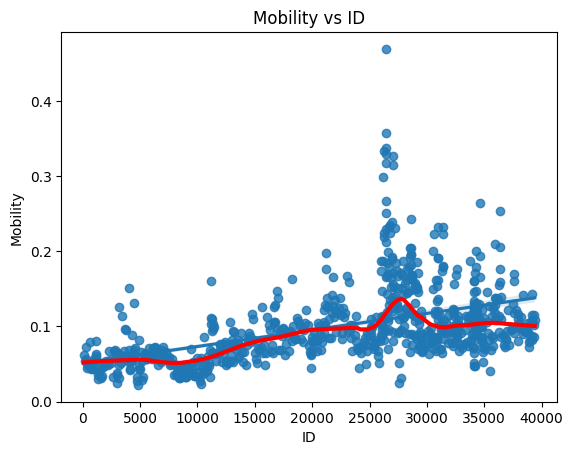

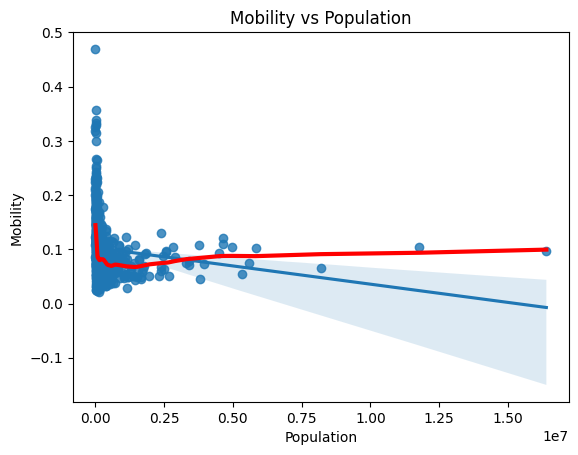

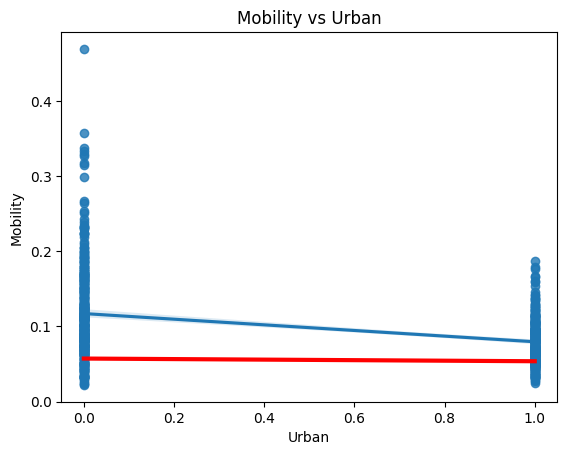

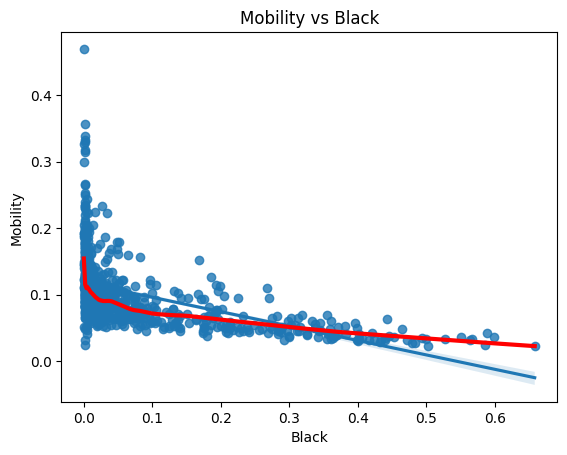

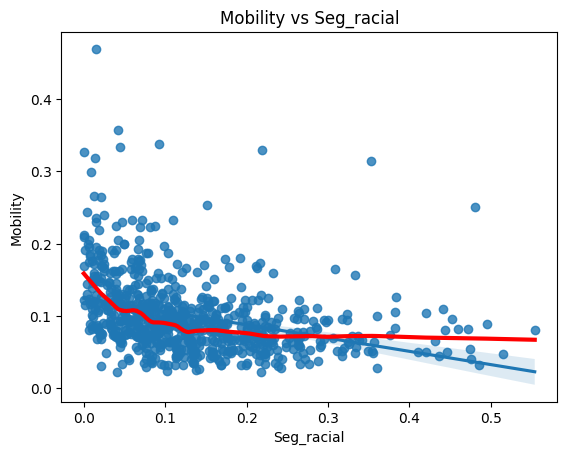

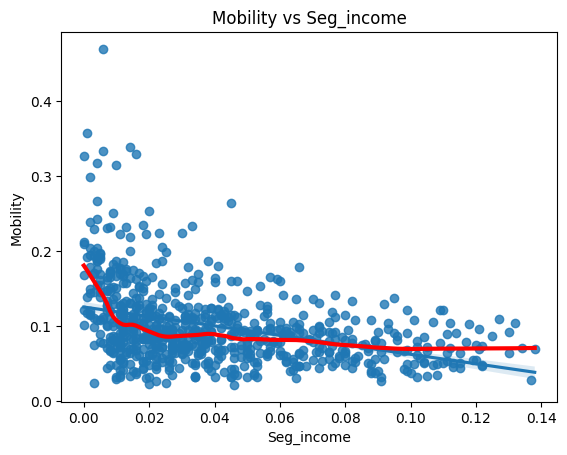

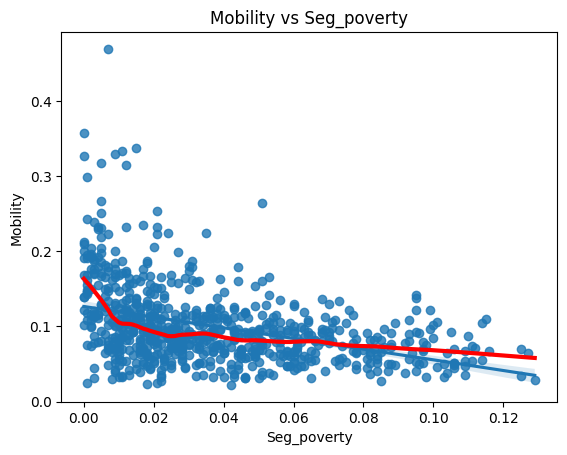

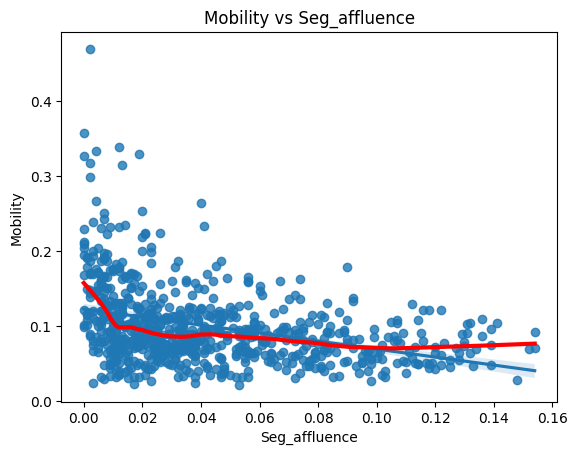

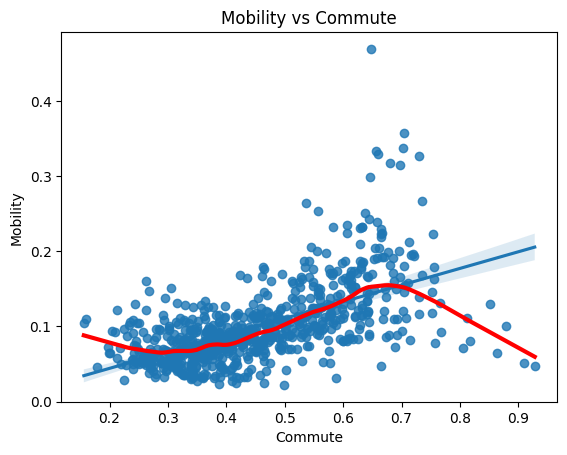

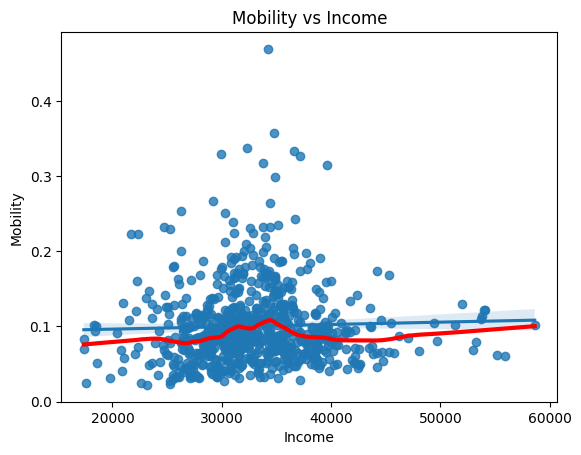

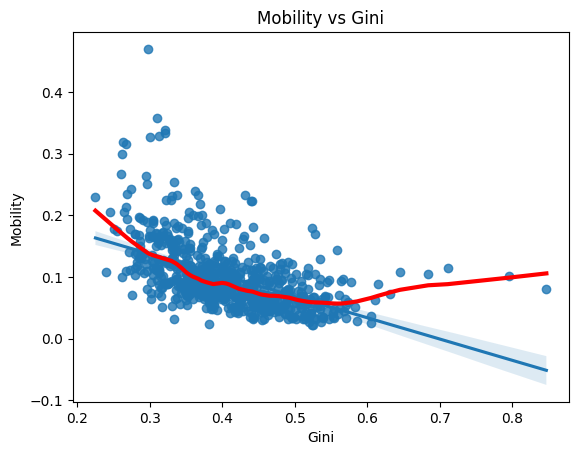

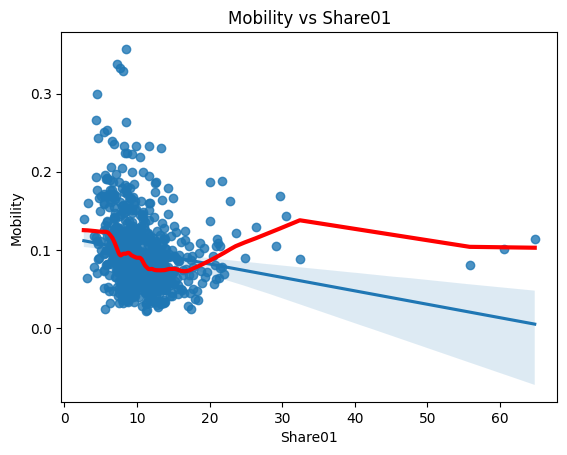

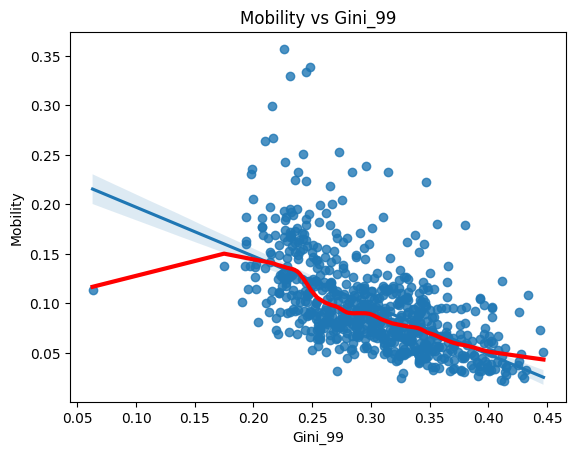

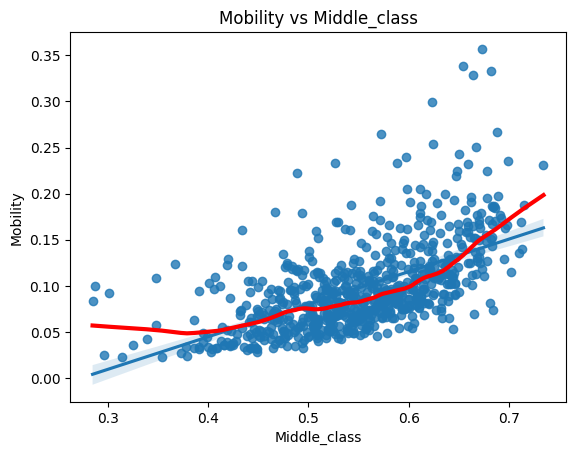

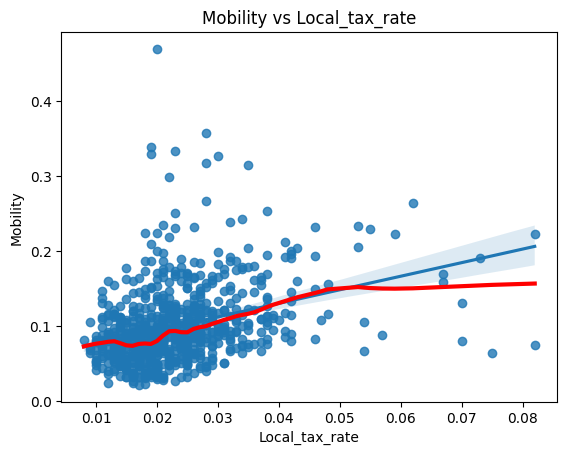

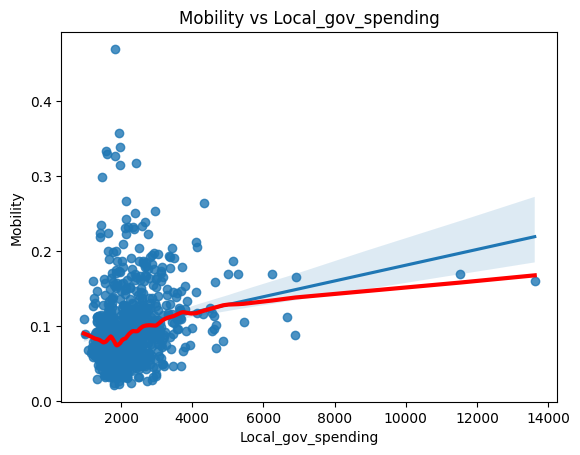

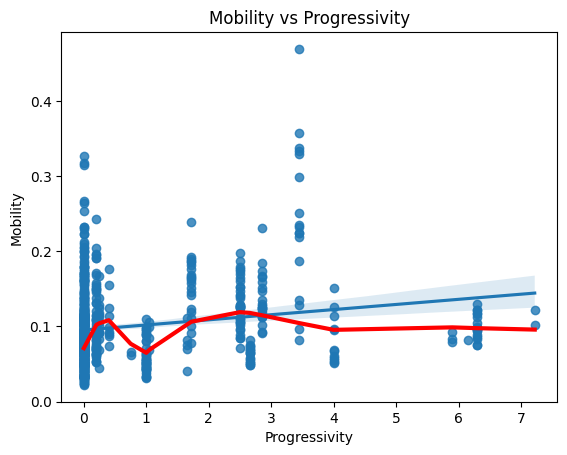

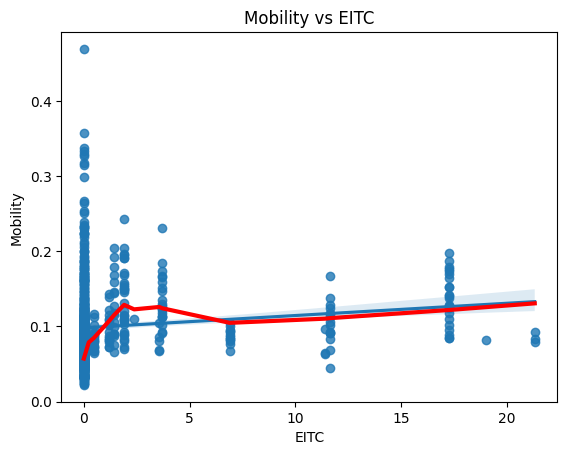

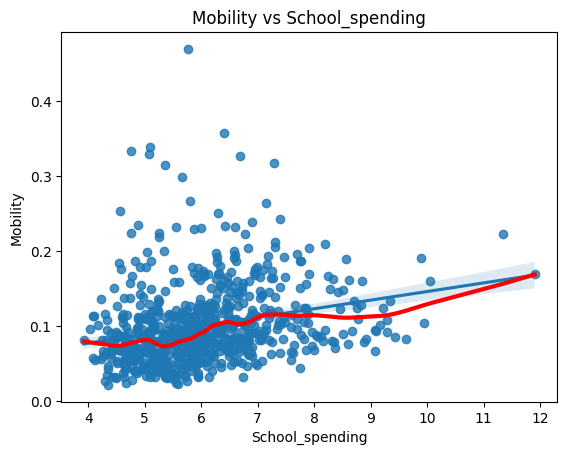

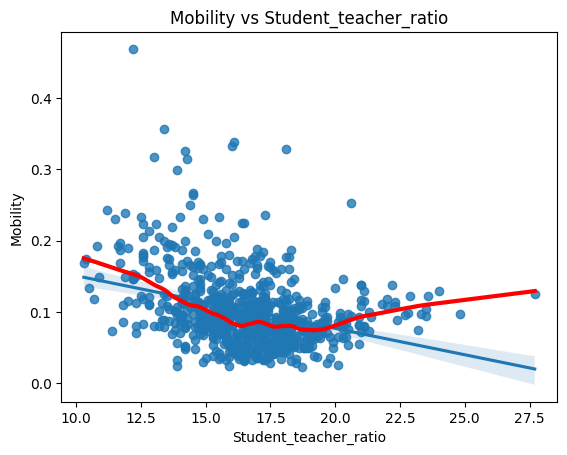

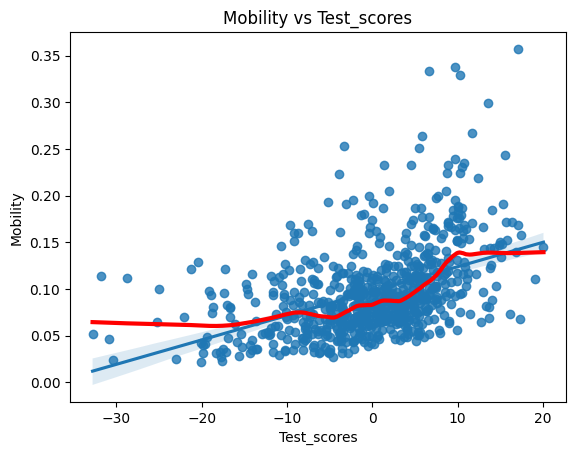

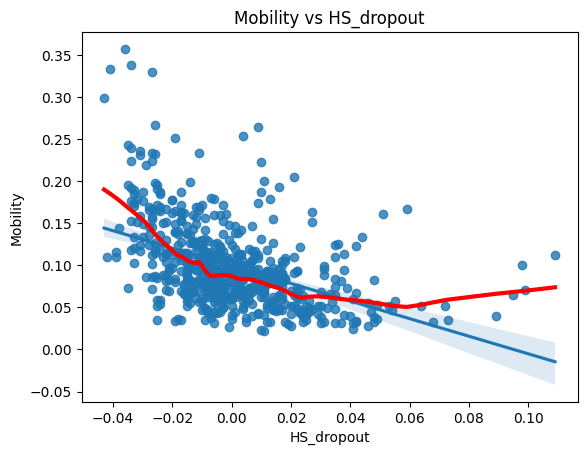

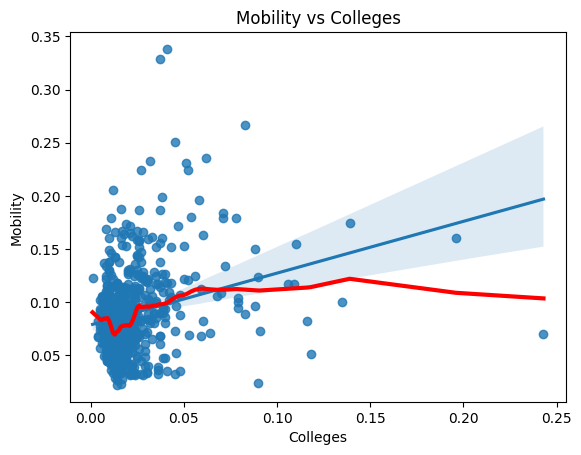

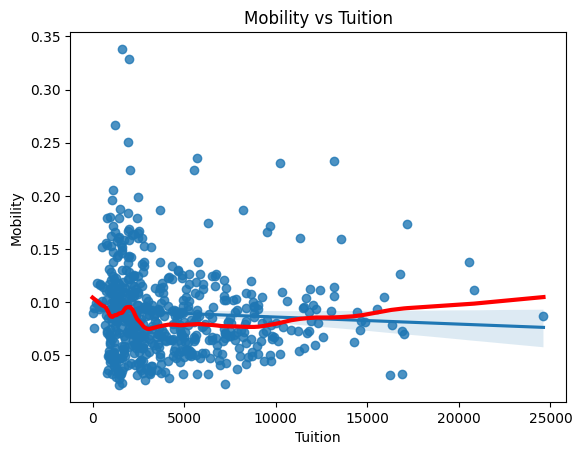

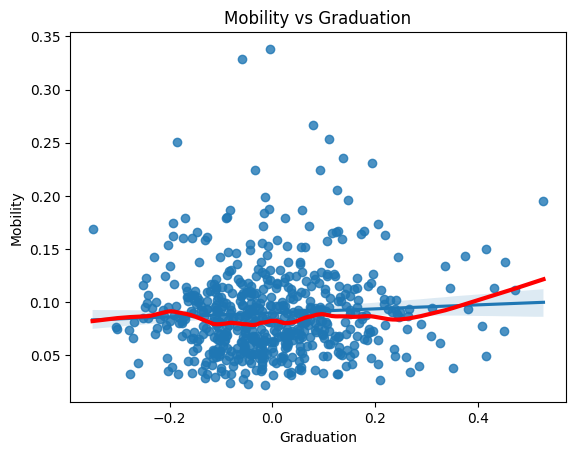

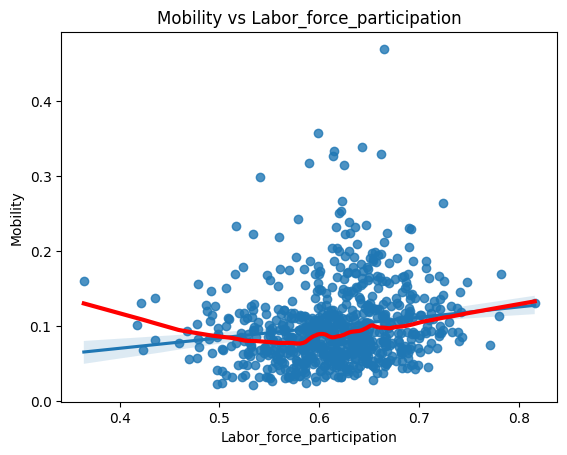

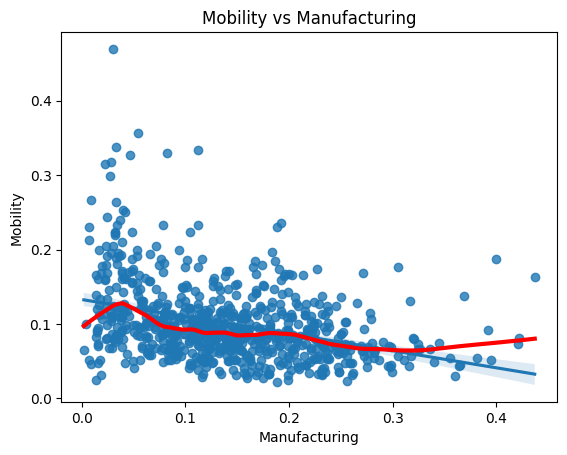

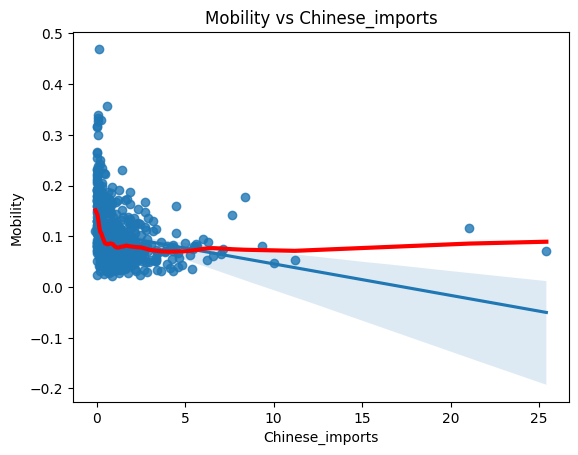

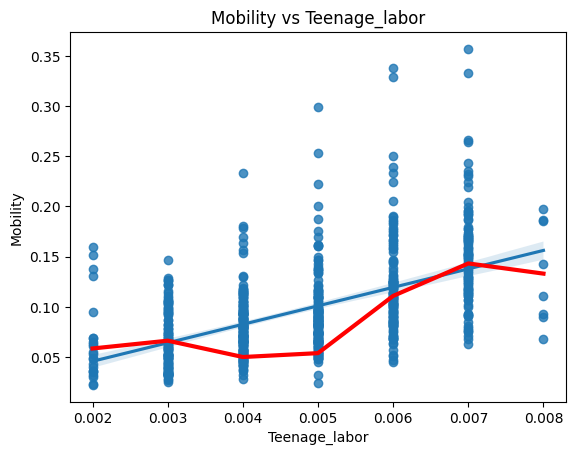

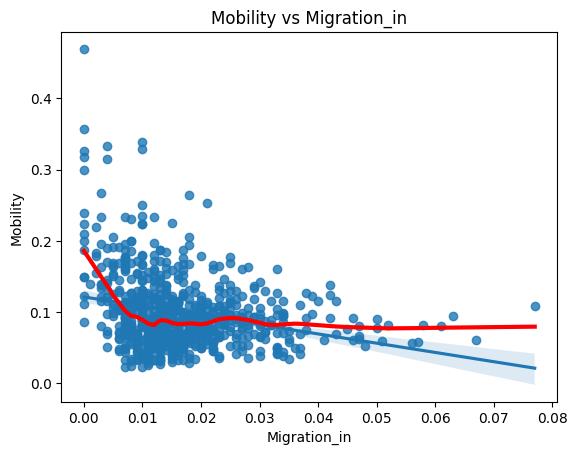

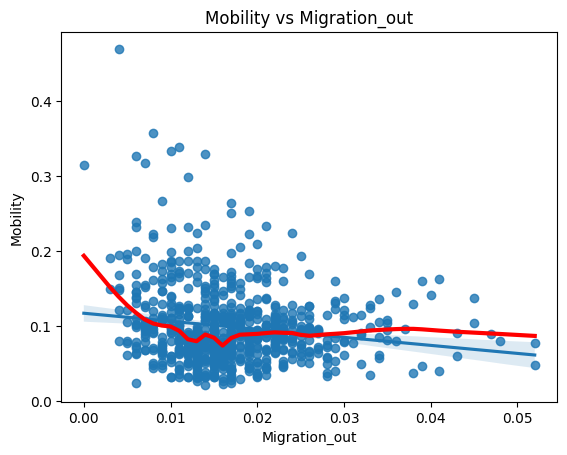

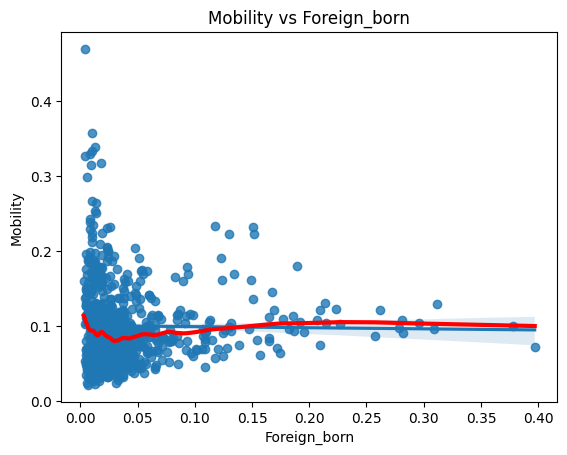

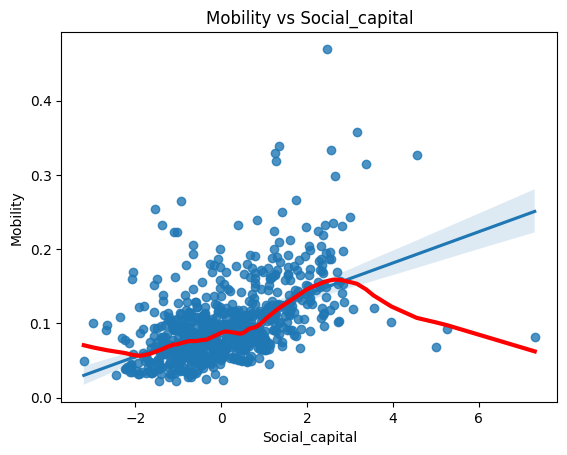

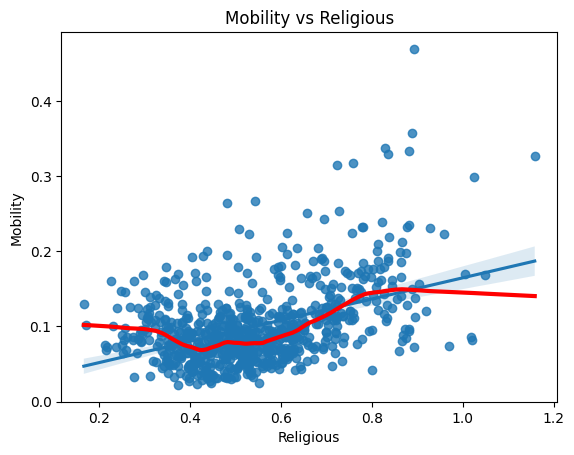

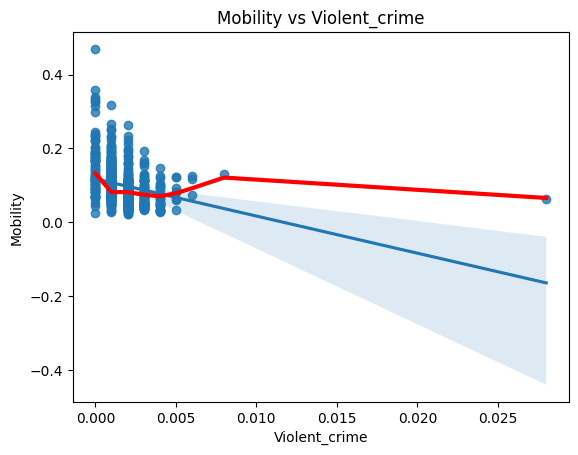

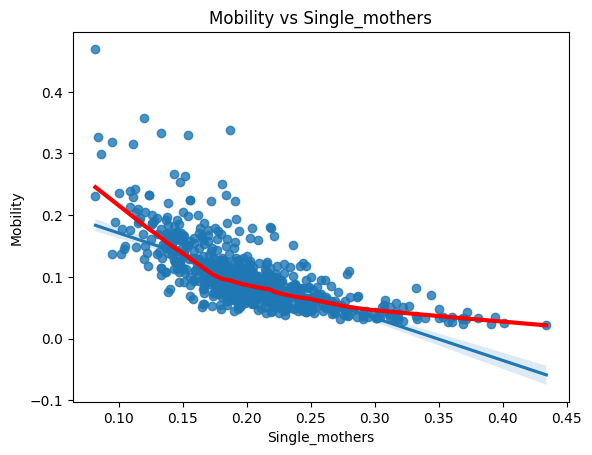

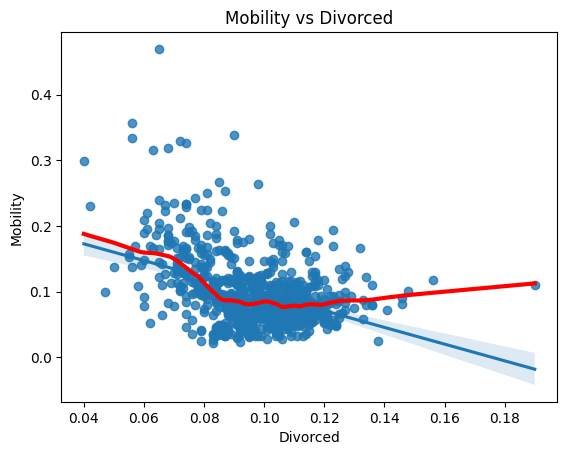

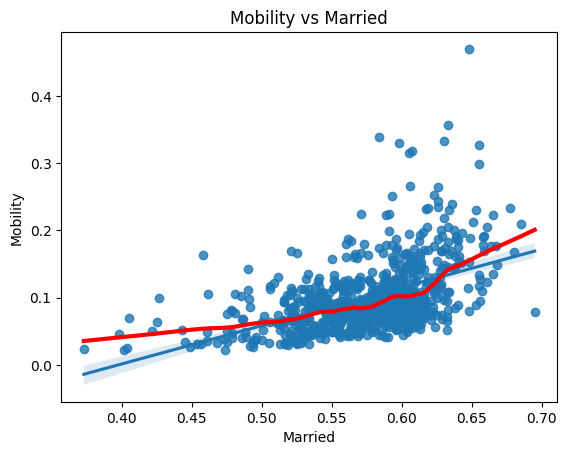

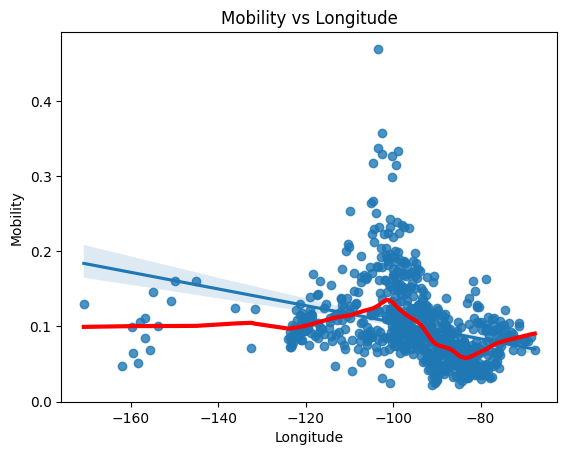

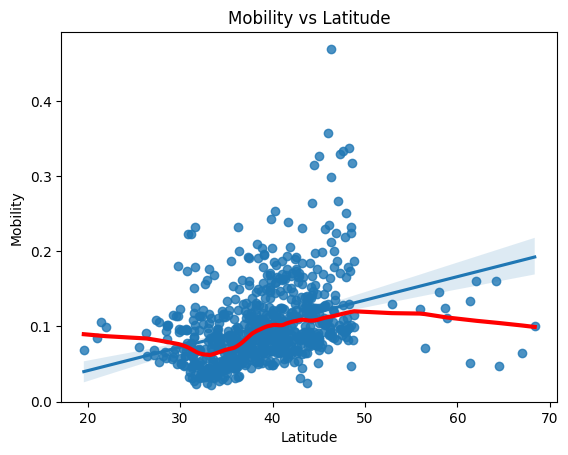

In [162]:
import statsmodels.api as sm

for col in df_num.columns:
    sns.regplot(data=df, x=col, y='Mobility')

    smoothed = sm.nonparametric.lowess(endog=df['Mobility'], exog=df[col], frac=0.2, it=3)
    smoothed_x = smoothed[:, 0]
    smoothed_y = smoothed[:, 1]
    plt.plot(smoothed_x, smoothed_y, color='red', linewidth=3)
    plt.xlabel(col)
    plt.ylabel('Mobility')
    plt.title(f'Mobility vs {col}')
    plt.show()

Observations:
* Lots of input is suitable for log transform (e.g. income, population scales)
    * some potential other transforms possible
* Some variables have a categorical structure

##### A look at the target

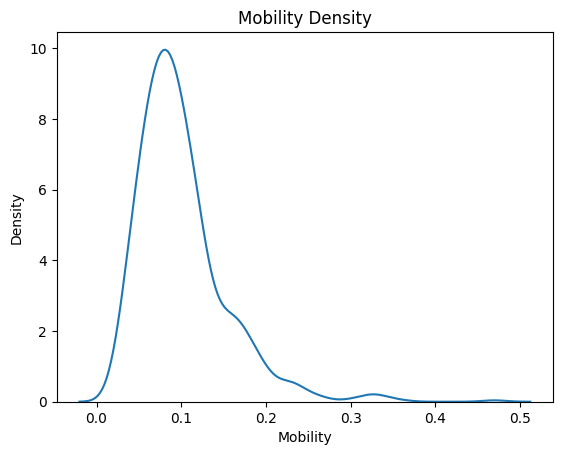

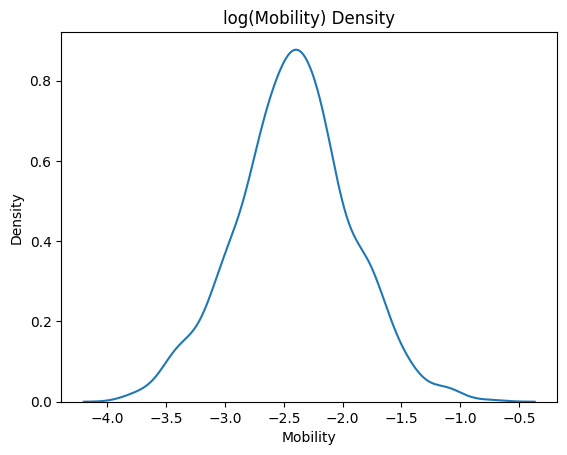

In [137]:
sns.kdeplot(data =df, x = 'Mobility')
plt.title('Mobility Density')
plt.show()

log_trans = np.log(df['Mobility'])
sns.kdeplot(data =log_trans)
plt.title('log(Mobility) Density')
plt.show()

Density is right tailed, doing a log transform could potentially help model. Will assess the QQ plots after model fitted.

In [175]:
import math

log_x = np.log(df_num.clip(lower=1e-9))
sqrt_x = np.sqrt(df_num.clip(lower=1e-9))

corr_before = df_num.corrwith(df['Mobility'], method='pearson')
corr_before = abs(corr_before)

corr_varlog = log_x.corrwith(df['Mobility'], method='pearson')
corr_varlog = abs(corr_varlog)

corr_sqrt = sqrt_x.corrwith(df['Mobility'], method='pearson')
corr_sqrt = abs(corr_sqrt)


df_corr = pd.DataFrame(corr_before).merge(pd.DataFrame(corr_varlog), left_index=True, right_index=True)
df_corr = df_corr.merge(pd.DataFrame(corr_sqrt), left_index=True, right_index=True)
df_corr['log_indicator'] = (df_corr.iloc[:, 0] < df_corr.iloc[:, 1]) & (df_corr.iloc[:, 2] < df_corr.iloc[:, 1])
df_corr['sqrt_indicator'] = (df_corr.iloc[:, 0] < df_corr.iloc[:, 2]) & (df_corr.iloc[:, 1] < df_corr.iloc[:, 2])
df_corr

C:\Users\TJ577DF\AppData\Local\Temp\ipykernel_43464\1571674499.py:3: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  log_x = np.log(df_num.clip(lower=1e-9))
C:\Users\TJ577DF\PycharmProjects\DataML\.venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\TJ577DF\AppData\Local\Temp\ipykernel_43464\1571674499.py:4: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objec

0_x       0_y         0  log_indicator  \
ID                         0.467139  0.441800  0.476770          False   
Population                 0.134850  0.492676  0.306114           True   
Urban                      0.354923       NaN  0.354923          False   
Black                      0.506027  0.536591  0.579977          False   
Seg_racial                 0.347018  0.367060  0.414662          False   
Seg_income                 0.379345  0.371818  0.435795          False   
Seg_poverty                0.393954  0.388512  0.446835          False   
Seg_affluence              0.356405  0.390274  0.416400          False   
Commute                    0.590634  0.565701  0.582363          False   
Income                     0.033785  0.050428  0.042259           True   
Gini                       0.525880  0.559934  0.544732           True   
Share01                    0.180642  0.281617  0.239749           True   
Gini_99                    0.575760  0.567626  0.575893          False   
Middle_class               0.579526  0.552862  0.567360          False   
Local_tax_rate             0.339951  0.345906  0.348550          False   
Local_gov_spending         0.189930  0.195804  0.197606          False   
Progressivity              0.189923  0.186974  0.209002          False   
EITC                       0.119591  0.159652  0.149839           True   
School_spending            0.249254  0.251671  0.251087           True   
Student_teacher_ratio      0.330187  0.357458  0.344607           True   
Test_scores                0.451494  0.374848  0.470179          False   
HS_dropout                 0.459414  0.349592  0.349438          False   
Colleges                   0.256822  0.273105  0.286482          False   
Tuition                    0.060417  0.063950  0.088704          False   
Graduation                 0.062342  0.043807  0.077061          False   
Labor_force_participation  0.154742  0.148123  0.151730          False   
Manufacturing              0.361411  0.380830  0.385865          False   
Chinese_imports            0.210108  0.308475  0.361431          False   
Teenage_labor              0.536051  0.505379  0.523377          False   
Migration_in               0.261635  0.416607  0.355064           True   
Migration_out              0.156862  0.245850  0.197168           True   
Foreign_born               0.014112  0.107496  0.055824           True   
Social_capital             0.509092  0.400476  0.515173          False   
Religious                  0.437981  0.370296  0.407045          False   
Violent_crime              0.281605  0.394314  0.412015          False   
Single_mothers             0.685885  0.738235  0.715199           True   
Divorced                   0.426483  0.464356  0.446887           True   
Married                    0.503585  0.489997  0.497177          False   
Longitude                  0.313986       NaN       NaN          False   
Latitude                   0.358365  0.360197  0.361098          False   

                           sqrt_indicator  
ID                                   True  
Population                          False  
Urban                               False  
Black                                True  
Seg_racial                           True  
Seg_income                           True  
Seg_poverty                          True  
Seg_affluence                        True  
Commute                             False  
Income                              False  
Gini                                False  
Share01                             False  
Gini_99                              True  
Middle_class                        False  
Local_tax_rate                       True  
Local_gov_spending                   True  
Progressivity                        True  
EITC                                False  
School_spending                     False  
Student_teacher_ratio               False  
Test_scores                          True  
HS_dropout                   

In [176]:
log_list = df_corr[df_corr['log_indicator'] == True].index
sqrt_list = df_corr[df_corr['sqrt_indicator'] == True].index

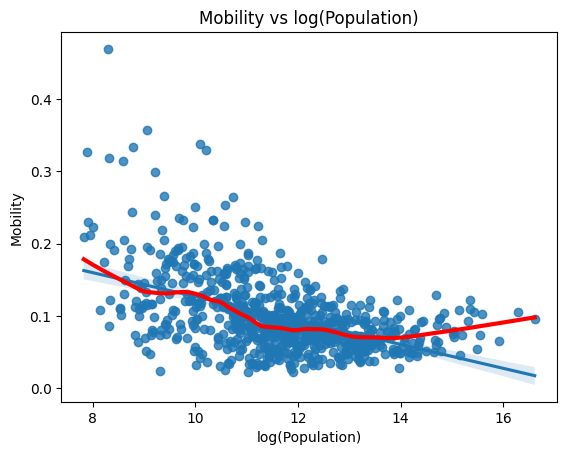

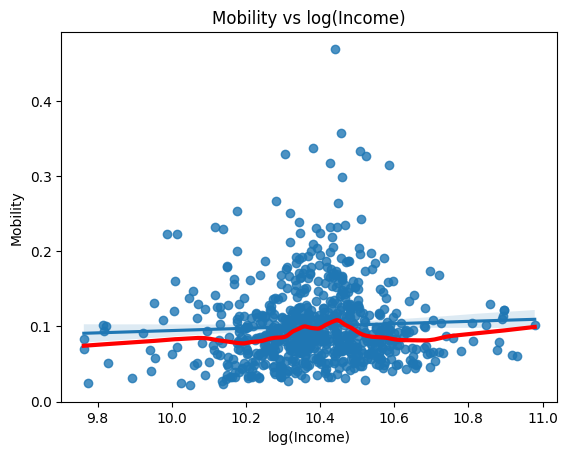

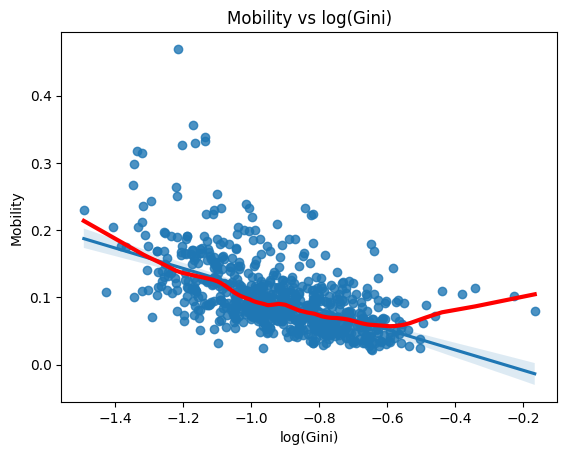

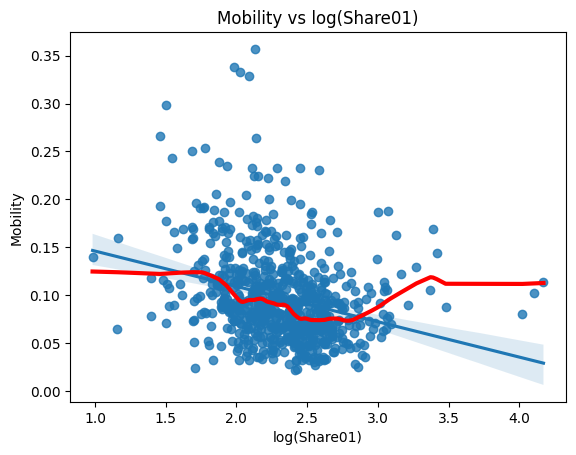

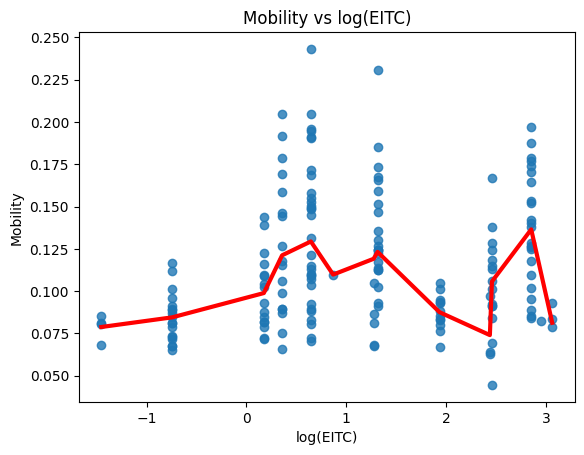

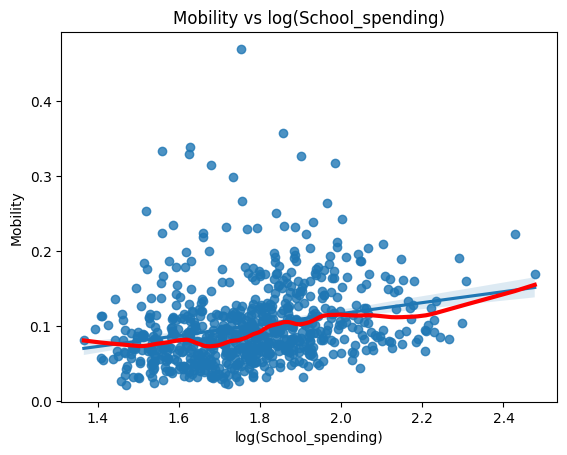

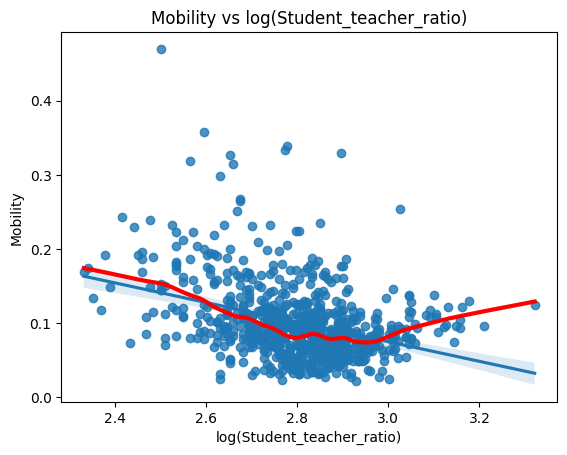

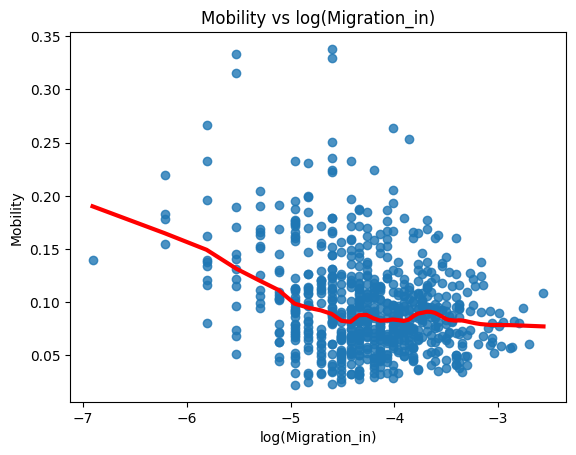

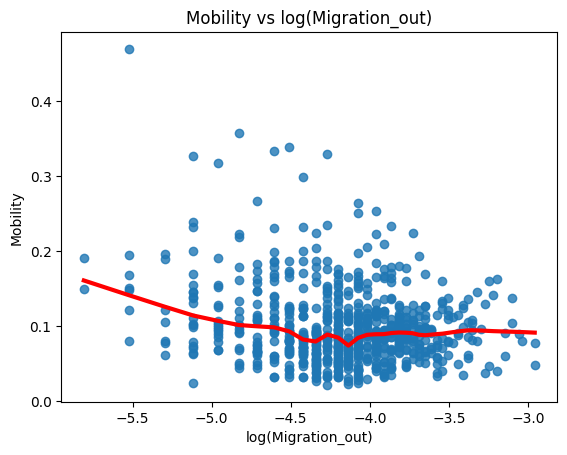

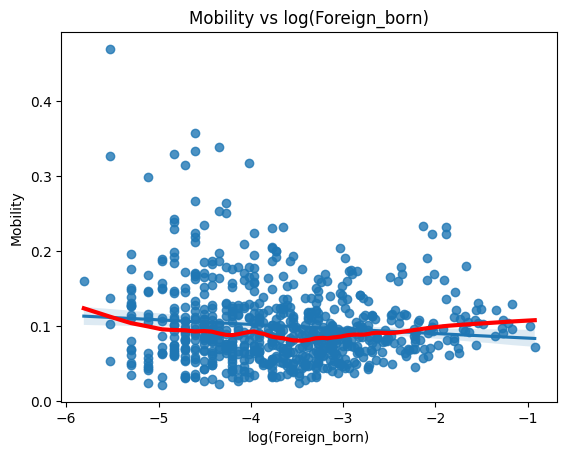

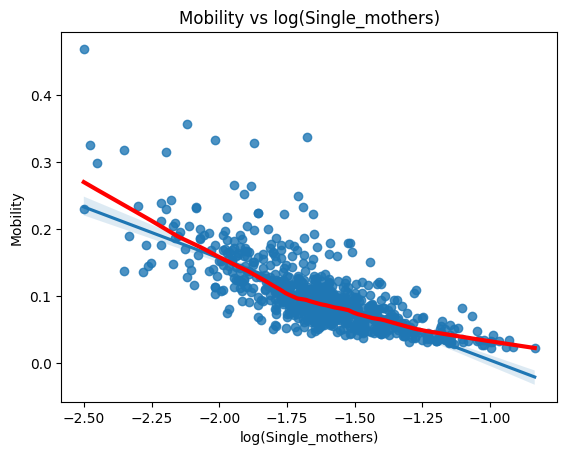

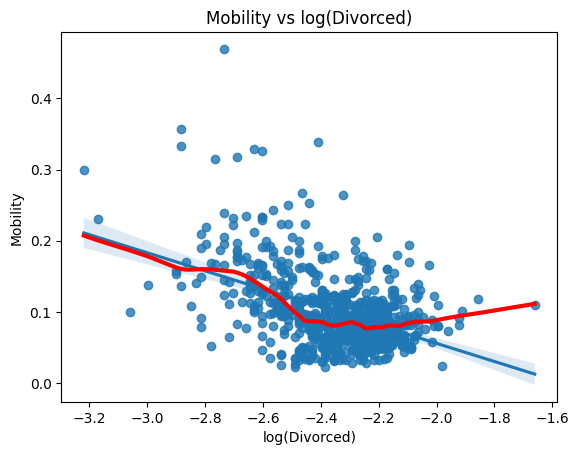

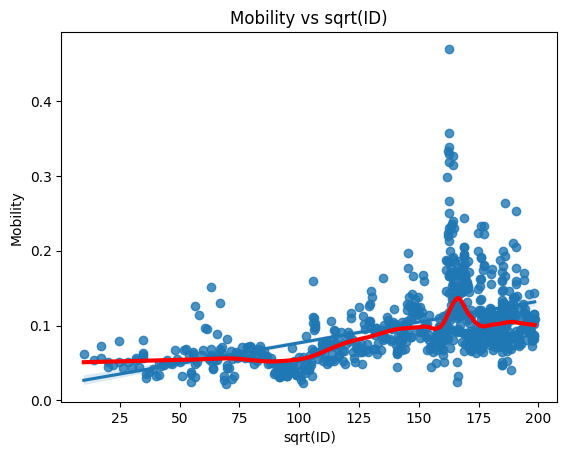

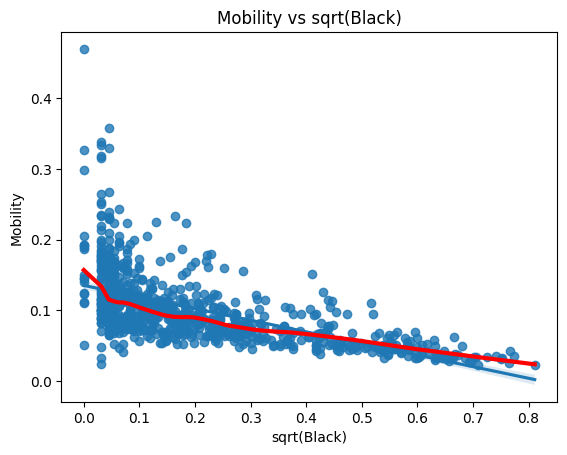

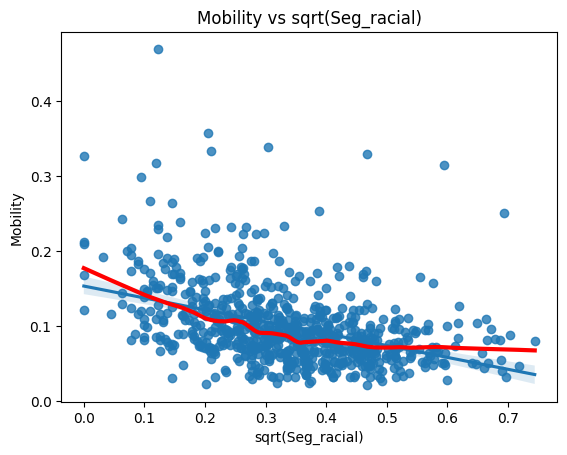

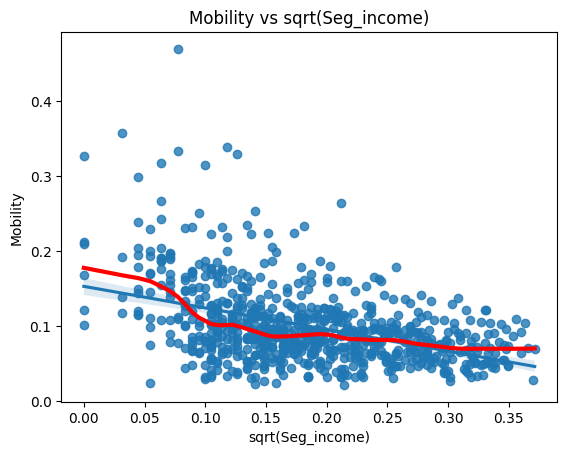

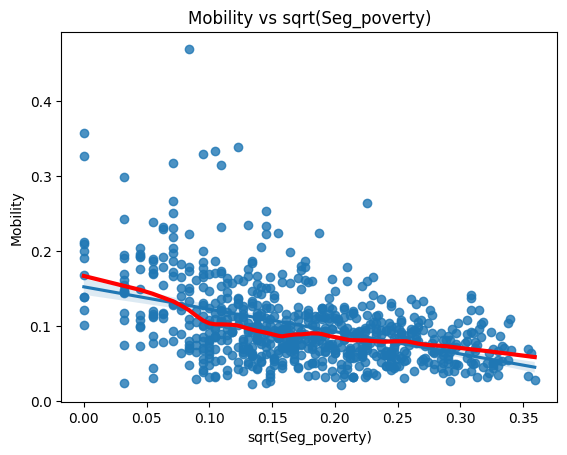

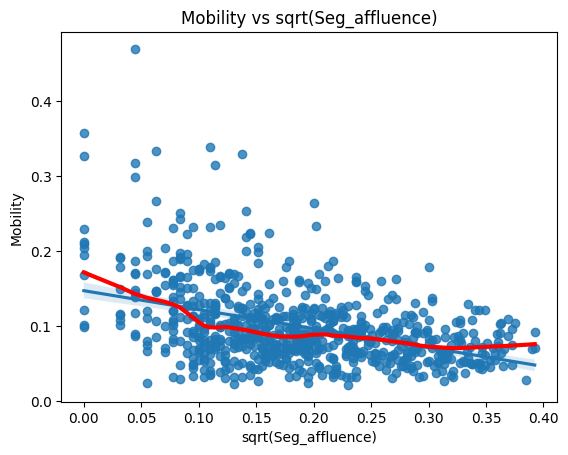

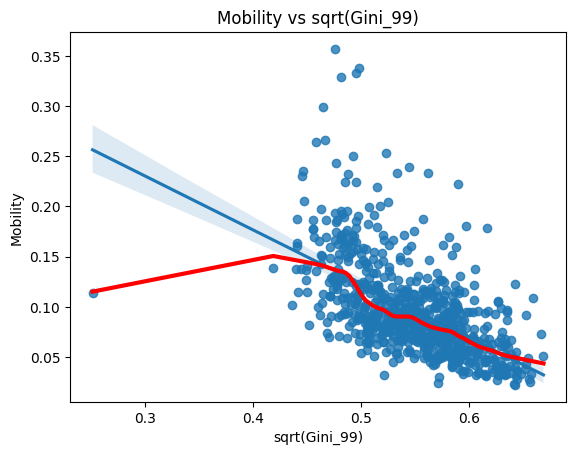

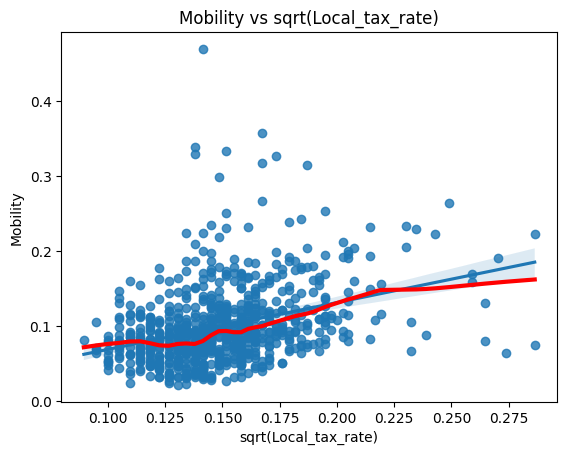

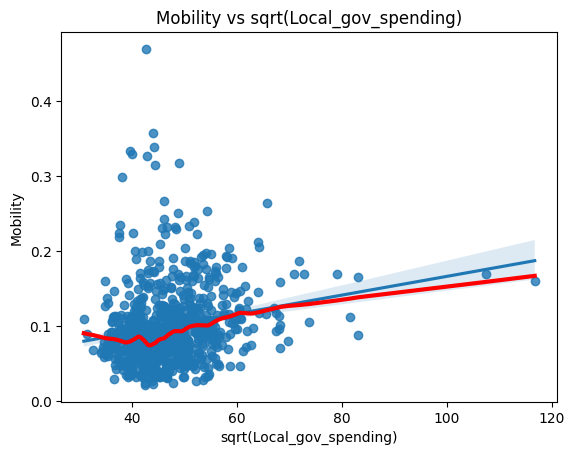

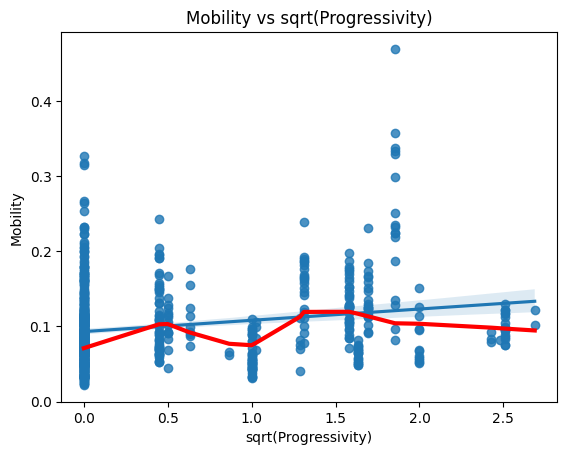

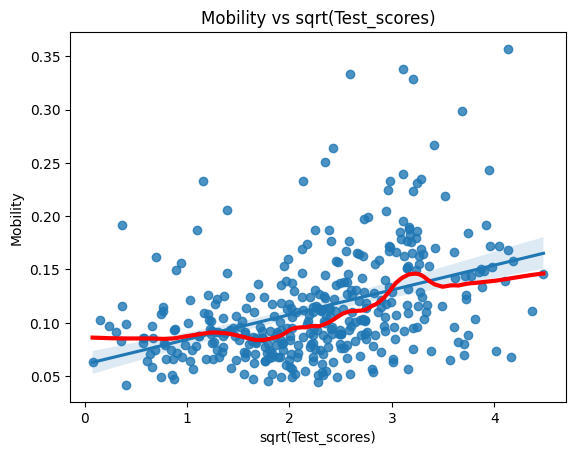

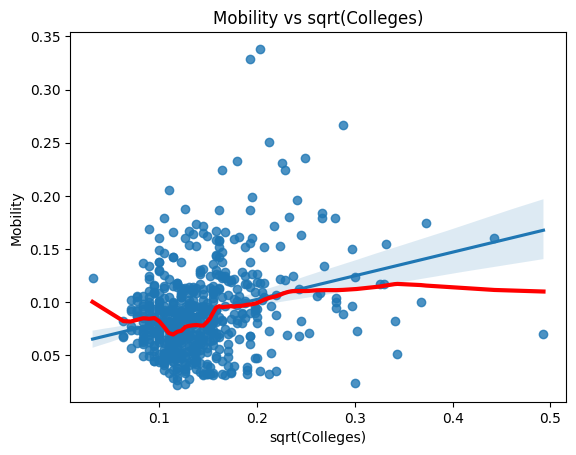

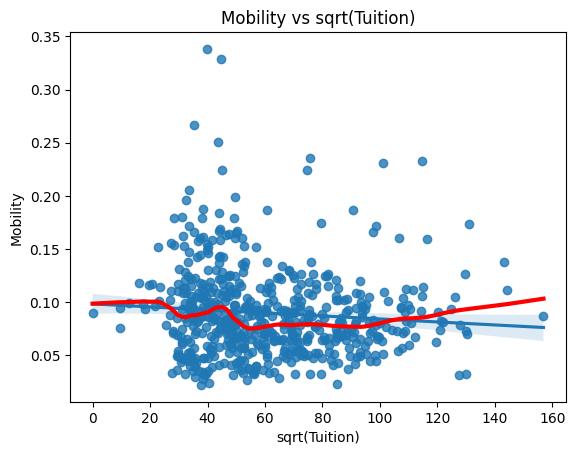

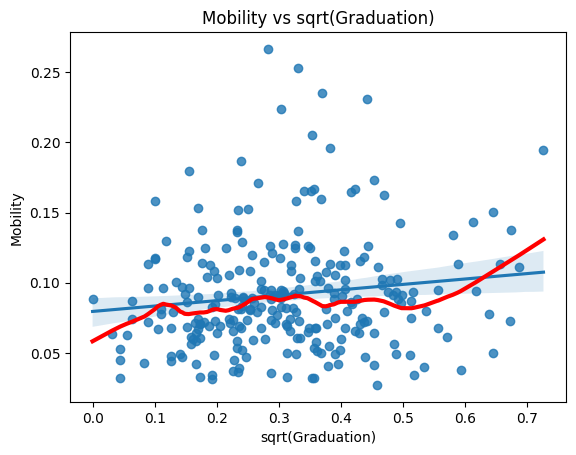

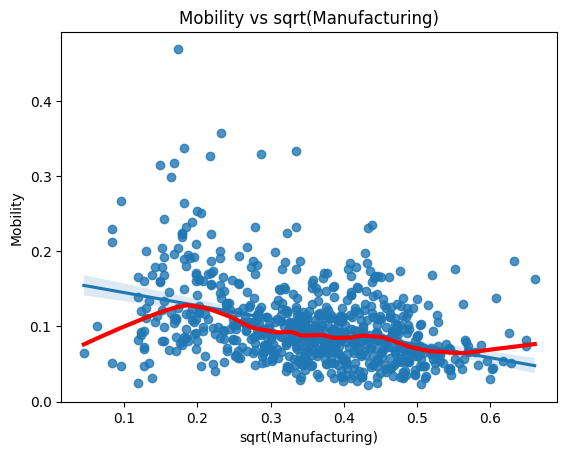

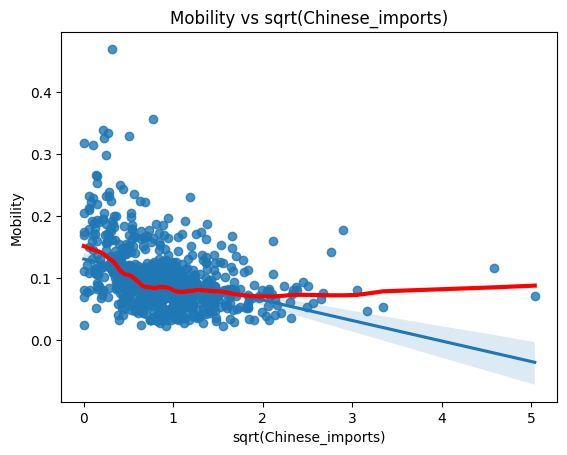

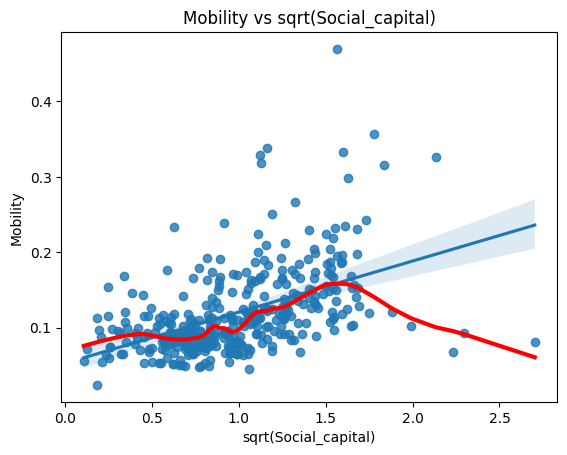

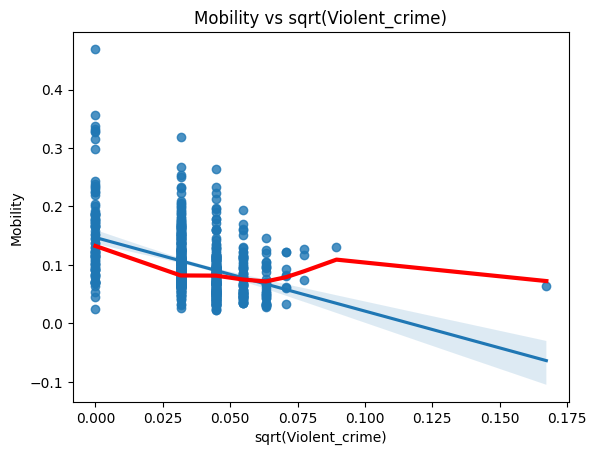

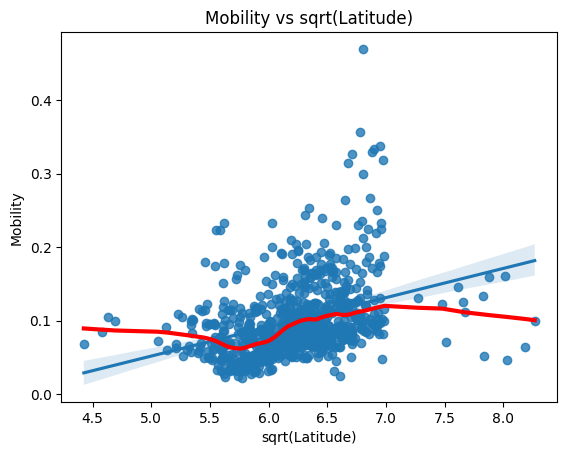

In [178]:
import statsmodels.api as sm

for col in log_list:
    x = np.log(df[col])
    y = df['Mobility']
    sns.regplot(x=x, y=y)

    smoothed = sm.nonparametric.lowess(y, x, frac=0.2, it=3)
    smoothed_x = smoothed[:, 0]
    smoothed_y = smoothed[:, 1]
    plt.plot(smoothed_x, smoothed_y, color='red', linewidth=3)
    plt.xlabel(f"log({col})")
    plt.ylabel('Mobility')
    plt.title(f'Mobility vs log({col})')
    plt.show()

for col in sqrt_list:
    x = np.sqrt(df[col])
    y = df['Mobility']
    sns.regplot(x=x, y=y)

    smoothed = sm.nonparametric.lowess(y, x, frac=0.2, it=3)
    smoothed_x = smoothed[:, 0]
    smoothed_y = smoothed[:, 1]
    plt.plot(smoothed_x, smoothed_y, color='red', linewidth=3)
    plt.xlabel(f"sqrt({col})")
    plt.ylabel('Mobility')
    plt.title(f'Mobility vs sqrt({col})')
    plt.show()